In [3]:
import pandas as pd
import numpy as np

# Loading Datasets

In [4]:
df=pd.read_csv(r"M:\software\AI_TRAINING_IBM\IBMPROJECTDOCS\Churn_Modelling.csv")

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


# Handling mising value in the dataset

In [6]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography           True
Gender              True
Age                 True
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             2
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df["Geography"].unique

<bound method Series.unique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

In [9]:
df["Geography"].mode()

0    France
Name: Geography, dtype: object

In [10]:
df["Geography"].fillna(df["Geography"].mode()[0],inplace=True)

In [11]:
df["Geography"].isnull().any()#cleared missing value in the Geography column

False

In [12]:
#now combinely handling missing value in the above two fields

In [13]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [14]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

In [15]:
df["Gender"].isnull().any()

False

In [16]:
#age calculation mean to handle the missing values

In [17]:
df["Age"].isnull().any()


True

In [18]:
df["Age"].mean()

38.921076322896866

In [19]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [20]:
df["Age"].isnull().sum()

0

# Find the outliers and replace the outliers

In [67]:
import numpy as np
import matplotlib.pyplot
from scipy import stats
z=np.abs(stats.zscore(df["Age"]))

In [22]:
z

0       0.293597
1       0.198240
2       0.293597
3       0.007526
4       0.388954
          ...   
9995    0.007526
9996    0.373902
9997    0.278545
9998    0.293597
9999    1.041401
Name: Age, Length: 10000, dtype: float64

In [23]:
a=df["Age"]
a

0       42.0
1       41.0
2       42.0
3       39.0
4       43.0
        ... 
9995    39.0
9996    35.0
9997    36.0
9998    42.0
9999    28.0
Name: Age, Length: 10000, dtype: float64

In [24]:
Q1=np.percentile(df["Age"],25,interpolation="midpoint")

In [25]:
Q3=np.percentile(df["Age"],75,interpolation="midpoint")

In [26]:
IQR=Q3-Q1

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [27]:
upper=np.where(df["Age"]>=(Q3+1.5*IQR))#outlier above range
lower=np.where(df["Age"]<=(Q3-1.5*IQR))#outlier below range

In [28]:
upper

(array([  58,   85,  104,  158,  181,  230,  234,  243,  252,  276,  310,
         364,  371,  385,  387,  399,  538,  559,  567,  602,  612,  617,
         658,  678,  696,  736,  766,  769,  807,  811,  823,  859,  884,
         888,  948,  952,  957,  963,  969,  997, 1009, 1039, 1040, 1055,
        1114, 1205, 1234, 1235, 1246, 1252, 1278, 1285, 1328, 1342, 1387,
        1407, 1410, 1433, 1439, 1457, 1519, 1543, 1607, 1614, 1642, 1790,
        1810, 1866, 1901, 1904, 1907, 1933, 1981, 1996, 2002, 2012, 2039,
        2053, 2078, 2094, 2108, 2154, 2159, 2164, 2244, 2274, 2433, 2458,
        2459, 2519, 2553, 2599, 2615, 2659, 2670, 2713, 2717, 2760, 2772,
        2778, 2791, 2855, 2877, 2901, 2908, 2925, 2926, 3008, 3033, 3054,
        3110, 3142, 3166, 3192, 3203, 3229, 3305, 3308, 3311, 3314, 3317,
        3346, 3366, 3368, 3378, 3382, 3384, 3387, 3396, 3403, 3434, 3462,
        3497, 3499, 3527, 3531, 3541, 3559, 3573, 3575, 3593, 3602, 3641,
        3646, 3647, 3651, 3690, 3691, 

In [29]:
lower

(array([  11,   13,   17,   19,   25,   57,   64,   69,   73,   75,   86,
          98,  129,  133,  145,  160,  166,  169,  214,  233,  246,  247,
         248,  263,  284,  288,  295,  318,  319,  329,  343,  344,  353,
         389,  394,  404,  410,  415,  425,  445,  462,  464,  472,  481,
         498,  508,  527,  531,  541,  549,  552,  594,  601,  614,  655,
         656,  672,  684,  714,  722,  727,  730,  731,  740,  741,  746,
         763,  786,  814,  815,  846,  849,  865,  885,  899,  909,  923,
         929,  945,  971,  984, 1004, 1013, 1024, 1031, 1037, 1048, 1054,
        1064, 1067, 1072, 1084, 1088, 1098, 1113, 1121, 1136, 1170, 1177,
        1181, 1194, 1202, 1213, 1218, 1238, 1241, 1243, 1247, 1249, 1280,
        1324, 1327, 1345, 1360, 1370, 1380, 1383, 1406, 1417, 1429, 1445,
        1449, 1458, 1460, 1472, 1475, 1476, 1482, 1498, 1529, 1530, 1540,
        1548, 1571, 1574, 1575, 1577, 1610, 1615, 1619, 1622, 1624, 1634,
        1668, 1670, 1673, 1678, 1684, 

In [30]:
np.where(upper)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [31]:
np.where(lower)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [32]:
df["Age"].drop(lower[0],inplace=True)

In [33]:
df["Age"]

0       42.0
1       41.0
2       42.0
3       39.0
4       43.0
        ... 
9995    39.0
9996    35.0
9997    36.0
9998    42.0
9999    28.0
Name: Age, Length: 10000, dtype: float64

# Encoding


In [34]:
x=df.iloc[:,3:13]
y=df.iloc[:,13:14]

In [35]:
type(x)

pandas.core.frame.DataFrame

In [36]:
type(y)

pandas.core.frame.DataFrame

In [37]:
x.values#x dataframe into numpy array

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [38]:
y.values#dataframe into numpy array

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [39]:
x.shape

(10000, 10)

In [40]:
y.shape

(10000, 1)

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [42]:
pt=ColumnTransformer([("oh",OneHotEncoder(),[1,2])],remainder="passthrough")
x=pt.fit_transform(x)

In [43]:
x#after transforming

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

# Train and Test splitting

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x_train.shape

(8000, 13)

In [46]:
y_train.shape

(8000, 1)

# Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
p=StandardScaler()

In [48]:
q=p.fit_transform(x)

In [49]:
q

array([[ 0.99700449, -0.57858195, -0.57380915, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.00300451, -0.57858195,  1.74273971, ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 0.99700449, -0.57858195, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.99700449, -0.57858195, -0.57380915, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-1.00300451,  1.72836363, -0.57380915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 0.99700449, -0.57858195, -0.57380915, ...,  0.64609167,
        -1.03067011, -1.07636976]])

# Standard Scaling and Normalization

In [50]:
x_test=p.fit_transform(x_train)
y_test=p.fit_transform(y_train)

In [51]:
x_test

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [52]:
y_test

array([[-0.50624244],
       [-0.50624244],
       [-0.50624244],
       ...,
       [-0.50624244],
       [-0.50624244],
       [ 1.97533814]])

# Plotting


<AxesSubplot:xlabel='Age'>

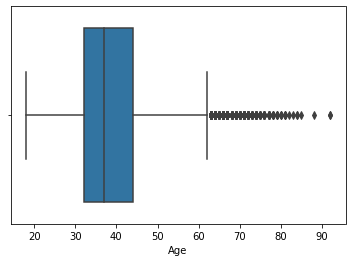

In [66]:
import seaborn as sns
sns.boxplot(df["Age"])

In [57]:
import numpy as np
print(np.where(df["Age"]>60))

(array([  42,   44,   58,   85,  104,  158,  181,  230,  234,  243,  252,
        276,  310,  364,  371,  385,  387,  399,  416,  484,  538,  559,
        561,  567,  602,  612,  617,  630,  658,  678,  696,  736,  766,
        769,  807,  811,  823,  859,  884,  888,  921,  928,  948,  952,
        957,  963,  969,  997, 1009, 1039, 1040, 1055, 1114, 1118, 1192,
       1205, 1234, 1235, 1246, 1252, 1278, 1285, 1328, 1342, 1387, 1407,
       1410, 1433, 1439, 1457, 1519, 1543, 1588, 1607, 1614, 1642, 1790,
       1810, 1858, 1866, 1901, 1904, 1907, 1933, 1981, 1996, 2002, 2012,
       2039, 2053, 2078, 2094, 2103, 2108, 2154, 2159, 2164, 2244, 2261,
       2274, 2298, 2301, 2433, 2438, 2458, 2459, 2519, 2520, 2533, 2541,
       2553, 2599, 2615, 2659, 2670, 2713, 2717, 2760, 2772, 2777, 2778,
       2781, 2791, 2855, 2877, 2901, 2908, 2925, 2926, 3008, 3033, 3054,
       3110, 3142, 3166, 3192, 3203, 3229, 3305, 3308, 3311, 3314, 3317,
       3346, 3366, 3368, 3378, 3382, 3384, 3387, 3

In [58]:
df["Age"][0:400]

0      42.0
1      41.0
2      42.0
3      39.0
4      43.0
       ... 
395    37.0
396    33.0
397    32.0
398    39.0
399    66.0
Name: Age, Length: 400, dtype: float64

In [59]:
from scipy import stats
z=np.abs(stats.zscore(df["Age"]))

In [60]:
z

0       0.293597
1       0.198240
2       0.293597
3       0.007526
4       0.388954
          ...   
9995    0.007526
9996    0.373902
9997    0.278545
9998    0.293597
9999    1.041401
Name: Age, Length: 10000, dtype: float64

In [64]:
threshold=4
print(np.where(z>4))

(array([ 766, 2458, 3033, 3387, 3531, 4931, 6443, 6759, 7526, 7956, 9080,
       9309], dtype=int64),)


In [77]:
df["Age"].head()

0    42.0
1    41.0
2    42.0
3    39.0
4    43.0
Name: Age, dtype: float64

In [78]:
df["Age"].tail()

9995    39.0
9996    35.0
9997    36.0
9998    42.0
9999    28.0
Name: Age, dtype: float64